### SVM Kernels Indepth Intuition And Practical Explanation

In [137]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import plotly.express as px

#### Data Formation:

In [138]:
# generates 100 data points for first class between -5.0 and 5.0 and save it in x. Then define y.
x = np.linspace(-5.0, 5.0, 100)
y = np.sqrt(10**2 - x**2)

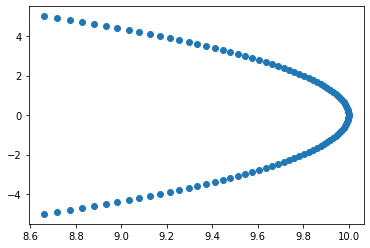

In [139]:
plt.scatter(y,x)

In [140]:
# generate mirror points by adding negative of above generated points.
y=np.hstack([y,-y])
x=np.hstack([x,-x])

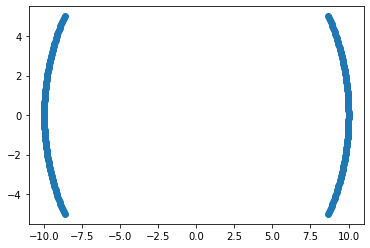

In [141]:
# shows added mirror plot by new points
plt.scatter(y,x)

In [142]:
# now generate 100 points for second class between -5.0 and 5.0 and save it in x1. Then define new y1.
x1 = np.linspace(-5.0, 5.0, 100)
y1 = np.sqrt(5**2 - x1**2)

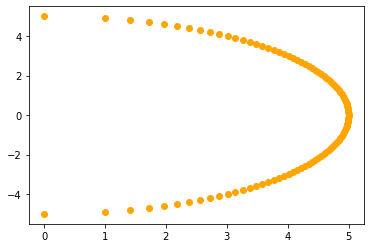

In [143]:
plt.scatter(y1,x1,color='orange')

In [144]:
y1=np.hstack([y1,-y1])
x1=np.hstack([x1,-x1])

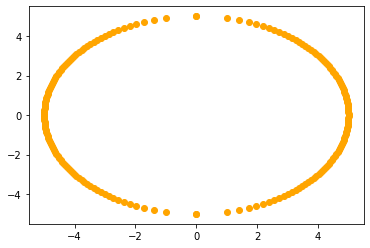

In [145]:
plt.scatter(y1,x1,color='orange')

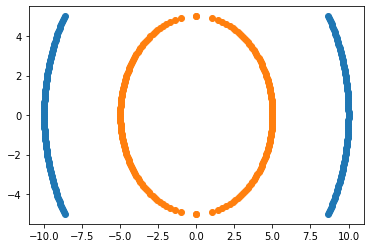

In [146]:
# the graph shows points of both classes
plt.scatter(y,x)
plt.scatter(y1,x1)

In [147]:
# define dataframes and stack data of both classes vertically

# CLASS 0
df1 =pd.DataFrame(np.vstack([y,x]).T,columns=['X1','X2'])
df1['Y']=0
# CLASS 1
df2 =pd.DataFrame(np.vstack([y1,x1]).T,columns=['X1','X2'])
df2['Y']=1
# combine both classes to make final dataframe
df = pd.concat([df1,df2])
df = df.sample(frac=1)

df.reset_index(inplace=True,drop=True)

df.head(5)

,X1,X2,Y
0,-9.999872,0.050505,0
1,-8.660254,-5.000000,0
2,9.932303,1.161616,0
3,4.987486,0.353535,1
4,-8.932829,4.494949,0


In [148]:
# define independent and dependent features
X = df.iloc[:, :2]  
y = df.Y

In [149]:
# Split the dataset into train and test
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [150]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.48

- By using direct x and y in SVC wit linear kernel, the accuracy score is very low.

### Polynomial Kernel

##### Using X1*X2 components

In [151]:
# new components connecting X1 ans X2 need to be added to data 
df['X1*X2'] = (df['X1'] *df['X2'])
df.head()

,X1,X2,Y,X1*X2
0,-9.999872,0.050505,0,-0.505044
1,-8.660254,-5.000000,0,43.301270
2,9.932303,1.161616,0,11.537524
3,4.987486,0.353535,1,1.763252
4,-8.932829,4.494949,0,-40.152614


In [152]:
# define independent and dependent features with new components
X = df[['X1','X2','X1*X2']]
y = df['Y']

In [153]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)


In [154]:
# 3D plot with X1, X2 adn X1*X2 as axes
fig = px.scatter_3d(df, x='X1', y='X2', z='X1*X2',
                color='Y')
fig.show()

In [155]:
# linear kernel
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.65

In [156]:
# polynomial kernel
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.79

##### X1_squared and X2_squared components

- Above 3D plot shows that the all points are still not linearly seperable.

In [157]:
df['X1_Square']= df['X1']**2
df['X2_Square']= df['X2']**2

In [158]:
# define independent and dependent features with new components
X = df[['X1','X2','X1*X2','X1_Square','X2_Square']]
y = df['Y']

In [159]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.25, 
                                                    random_state = 0)


In [160]:
# 3D plot with X1_square, X2_square adn X1*X2 as axes
fig = px.scatter_3d(df, x='X1_Square', y='X1_Square', z='X1*X2',
                color='Y')
fig.show()

- In second 3D plot, all the points of class 0 and class 1 are linearly seperable.

In [161]:
classifier = SVC(kernel="linear")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [162]:
classifier = SVC(kernel="poly")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [163]:
classifier = SVC(kernel="rbf")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0

In [164]:
classifier = SVC(kernel="sigmoid")
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

1.0